In [1]:
import Distributions: MvNormal

using Posets

using Distributions
using Plots
using LinearAlgebra

using DelimitedFiles

using SparseArrays

# Metodos

In [2]:
function metametodo_poset(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(poseto - poset)
end
function metametodo_posetposicion(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x]#=, rev = true=#) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(listaposicionespromedio(poseto) - listaposicionespromedio(poset))
end
function listaposicionespromedio(poset, pasos = 10^3)
    n,_ = size(poset)
    
    randomel = [caminatale(poset, 10^2) for _ in 1:pasos]
    [posicionpromedio(randomel, i) for i in 1:n]
end

listaposicionespromedio (generic function with 2 methods)

In [3]:
corte0p70 = x -> αcut_poset(x |>fuzzy, 0.70)
corte0p80 = x -> αcut_poset(x |>fuzzy, 0.80)
corte0p90 = x -> αcut_poset(x |>fuzzy, 0.90)
corte0p95 = x -> αcut_poset(x |>fuzzy, 0.95)
corte0p98 = x -> αcut_poset(x |>fuzzy, 0.98)

#17 (generic function with 1 method)

In [4]:
mat = [1. .3; .3 1.]
matcesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]
n2mat = [0.5 0.; 0. 0.5]
dimension = 2

2

# Probabilidad de obtener un poset

In [5]:
lista = Float64[]
tope=10^4

10000

In [ ]:
sqrt_third(x) = try
        println(sqrt(x[3])) 
    catch y 
        if isa(y, DomainError) 
            println(sqrt(complex(x[3], 0))) 
        elseif isa(y, BoundsError) 
            println(sqrt(x)) 
        end 
    end 
  

In [36]:
safegaussian(ranks,nodos,dimension,matruido,metodo) = try
                                                 pdp, punt = generapuntuaciones_gaussian(ranks,nodos,dimension;ruido=true,matruido=matruido,safe=true)
                                                 poset_metodo = metodo(punt)
                                                 norm(listaposicionespromedio(pdp)-listaposicionespromedio(poset_metodo))
                                               catch
                                                 nothing
                                               end


safegaussian (generic function with 2 methods)

In [37]:
normas0p80 = filter( x->!isnothing(x), [safegaussian(20,7,2,n2mat,corte0p80) for _ in 1:10^3] );

In [38]:
normas0p95 = filter( x->!isnothing(x), [safegaussian(20,7,2,n2mat,corte0p95) for _ in 1:10^3] );

In [40]:
normas0p98 = filter( x->!isnothing(x), [safegaussian(20,7,2,n2mat,corte0p98) for _ in 1:10^3] );

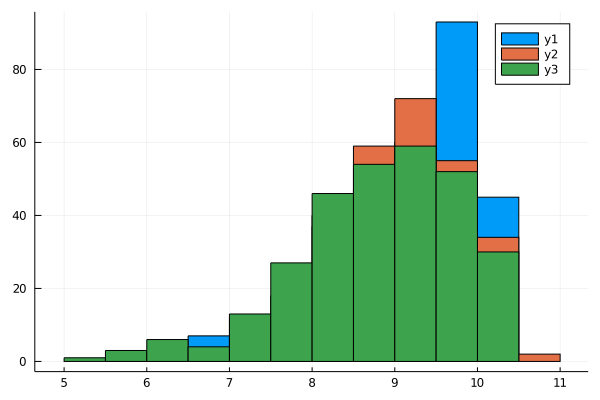

In [41]:
histogram([normas0p80, normas0p95, normas0p98])

In [6]:
for pasito in 0.01:0.005:0.2
    matruido = [pasito 0.; 0. pasito]
    malos = 0
    for i in 1:tope
        try
            generapuntuaciones_gaussian(20,7,2;ruido=true,matruido=matruido,safe=true)
        catch
            malos += 1
        end
    end
    push!(lista, malos/tope)
end

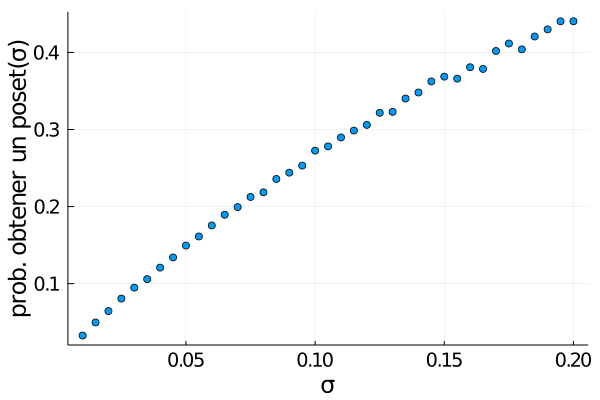

In [9]:
scatter(0.01:0.005:0.2,lista,xlabel="σ",ylabel="prob. obtener un poset(σ)",xtickfontsize=13, ytickfontsize=13, xguidefontsize=16, yguidefontsize=16, legendfontsize=10,label=false)

In [1]:
for pasito in 0.01:0.005:0.2
    matruido = [pasito 0.; 0. pasito]
    malos = 0
    for i in 1:tope
        try
            generapuntuaciones_gaussian(100,7,2;ruido=true,matruido=matruido,safe=true)
        catch
            malos += 1
        end
    end
    push!(lista, malos/tope)
end

LoadError: UndefVarError: tope not defined

Por la grafica se puede especular que para $\sigma \approx 1/2$ ya no se tendra casi nunca un poset.

# Analisis de posiciones

In [ ]:
resultados_sinruido = Float64[]

In [ ]:
for _ in 1:10^3
    dimension = 2
    mat = [1. .3; .3 1.]
    posetdepuntos, puntuaciones = generapuntuaciones_gaussian(20,7,dimension;matnodos=mat);
    push!(resultados_sinruido, metametodo_posetposicion(corte0p70, posetdepuntos, puntuaciones, true))
end